<a href="https://colab.research.google.com/github/nandanroy68/DSproject/blob/main/servomechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SERVO MECHANISM USING LINEAR AND POLYNOMIAL REGRESSION**

# **OBJECTIVE**
To understand how Machine Learning works practically and used for daily-life problems

# **DATA SOURCE**
https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:
1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5 5. Class 0.13 to 7.10

# **IMPORT LIBRARY**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# **IMPORT DATA**

In [3]:
servo= pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

# **DATA VISUALIZATION**

In [4]:
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# **DESCRIBE DATA**

In [5]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [6]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [40]:
servo[['Motor']].value_counts()

Motor
2        40
0        36
1        36
4        33
3        22
Name: count, dtype: int64

In [41]:
servo[['Screw']].value_counts()

Screw
0        42
1        35
2        31
3        30
4        29
Name: count, dtype: int64

# **DATA PREPROCESSING**

In [7]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [8]:
servo['Motor']=servo['Motor'].replace({'A':0,'B':1,'C':2,'D':3,'E':4})

servo['Screw']=servo['Screw'].replace({'A':0,'B':1,'C':2,'D':3,'E':4})

# **Define Target Variable (y) and Feature Variables (X)**

In [9]:
y=servo['Class']

In [10]:
x=servo.drop(['Class'],axis=1)

In [11]:
servo

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6
...,...,...,...,...,...
162,1,2,3,2,44
163,1,4,3,1,40
164,2,3,4,3,25
165,0,1,3,2,44


# **Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

# **MODELING(LINEAR REGRESSION)**

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

# **MODEL EVALUATION**

In [37]:
model.coef_

array([ -2.04322378,  -2.98953597, -14.59161593,   4.5836332 ])

In [38]:
model.intercept_

79.29807295805837

# **MODEL PREDICTION**

In [15]:
model.predict(x_test)

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# **TEST VISUALIZATION**

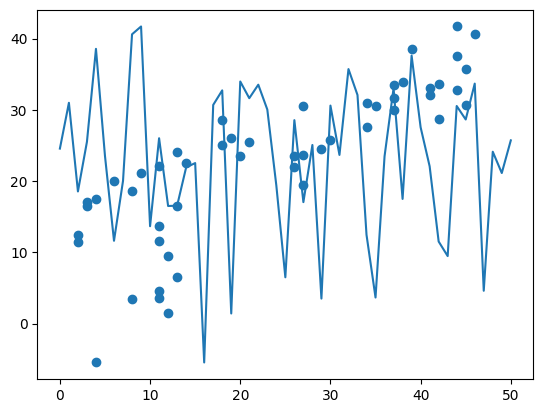

In [16]:
plt.plot(model.predict(x_test))
plt.scatter(y_test,model.predict(x_test))
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, mean_absolute_percentage_error

In [18]:
mean_absolute_error(y_test,model.predict(x_test))

7.190539677251235

In [19]:
mean_squared_error(y_test,model.predict(x_test))

66.03589175595563

In [20]:
r2_score(y_test,model.predict(x_test))

0.6807245170563927

In [21]:
mean_absolute_percentage_error(y_test,model.predict(x_test))

0.8268204638174629

In [22]:
data=pd.DataFrame({'Actual':y_test,'Predicted':model.predict(x_test)})
data

,Actual,Predicted
35,29,24.559453
107,34,30.987651
127,8,18.544855
115,21,25.515242
160,39,38.560820
156,26,23.520078
53,11,11.619471
89,6,20.033356
6,46,40.604044
165,44,41.700956


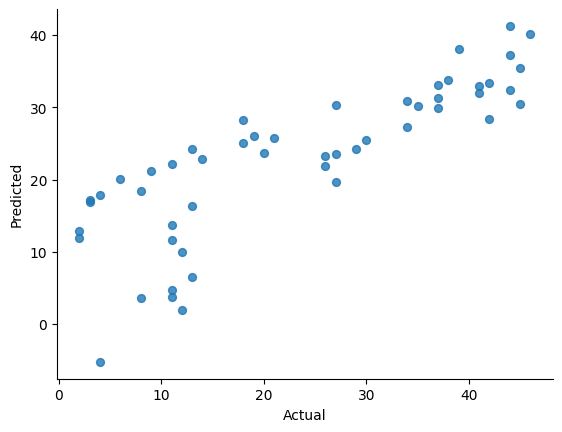

In [23]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Actual'>

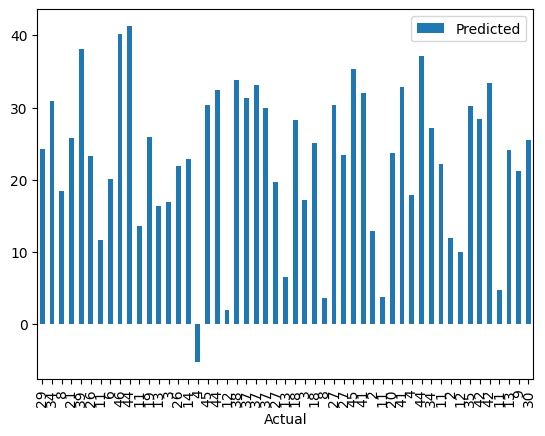

In [24]:
data.plot(kind='bar', x='Actual', y='Predicted')


<Axes: >

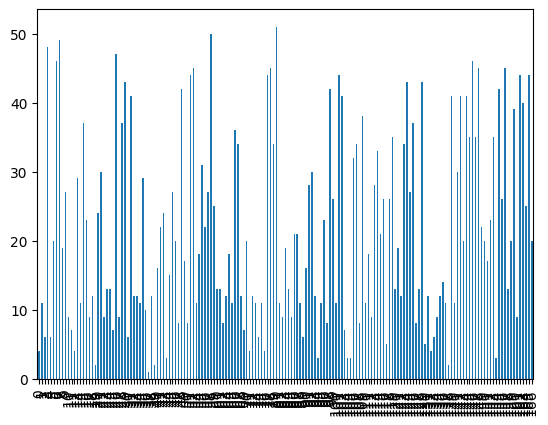

In [25]:
servo['Class'].plot(kind='bar')

In [43]:
d=pd.DataFrame({x:y:model.predict(x_test)})

In [44]:
d

,0
0,24.559453
1,30.987651
2,18.544855
3,25.515242
4,38.560820
5,23.520078
6,11.619471
7,20.033356
8,40.604044
9,41.700956


<Axes: >

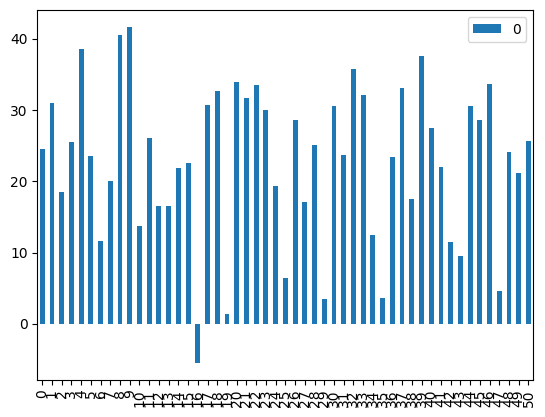

In [45]:
d.plot(kind='bar')

<Axes: >

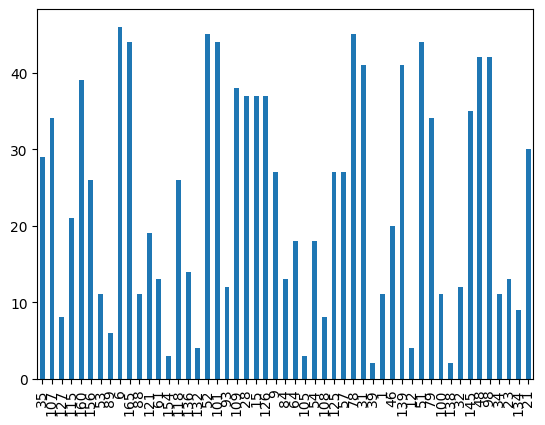

In [46]:
y_test.plot(kind='bar')

<Axes: >

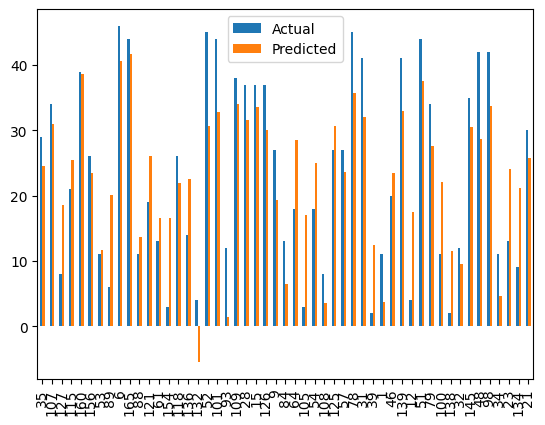

In [47]:
data.plot(kind='bar')

# **MODELING(POLYNOMIAL REGRESSION)**

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8899307593429356


In [25]:
y_pred

array([33.77156102, 34.22366868, 16.3181069 , 24.3808998 , 43.8552491 ,
       19.97381028,  6.63385693,  8.56827212, 45.43885274, 50.15818998,
        9.73708218, 21.18328388, 18.37020465,  5.23018032, 23.36340918,
       15.778     ,  5.70287116, 46.43546907, 53.83382048,  4.92450349,
       41.9199662 , 38.49995475, 38.00902766, 30.79333536, 23.07017493,
       20.35503714, 25.17673964,  5.58975621, 15.71826333, 13.36300569,
       25.73675477, 21.78378125, 50.38928367, 34.42849728, -1.18870919,
        7.51025984, 22.35546715, 35.61088148,  6.05014467, 40.9065601 ,
       32.96472326, 11.17984553, -1.37787126, -4.45247859, 34.37721214,
       40.62564203, 43.65035703,  6.66515175, 15.3799433 , 13.72027691,
       27.49911938])

In [26]:
mean_absolute_percentage_error(y_test,y_pred)

0.32049042136069605

In [33]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
35,29,33.771561
107,34,34.223669
127,8,16.318107
115,21,24.380900
160,39,43.855249
156,26,19.973810
53,11,6.633857
89,6,8.568272
6,46,45.438853
165,44,50.158190


# **TEST visualization**

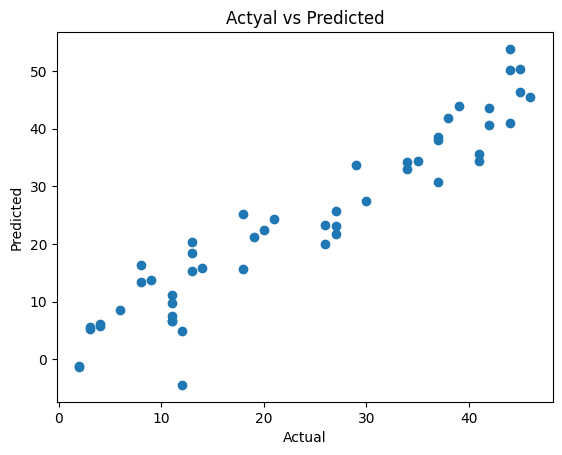

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actyal vs Predicted")
plt.show()

# **EXPLANATION**
Step 1: Importing built-in libraries: pandas used for analysing and making caluculations on datasets and numpy used mainly for working with arrays and matrices.
numpy for functions for working in domain of linear algebra, fourier transform, and matrices.

Step 2: importing data into the dataframe "servo" by using the read funtion along with the file extension and placing the required link/file path with the same extension.

Step 3: Describing the data:

servo.head(): Prints the first five rows of the data set
servo.info(): Prints all the information related to the dataset like the data type, number of rows and columns,memory usage, and if the value exists or if its null.
servo.describe():Prints the count, mean, std, min, max etc
servo.columns: Prints the column lables
servo.shape: Prints the number of rows and columns as an array[m.n]
Step 4: Counting and displaying the frequency of unique values:

servo[['Motor']].value_counts():

servo[['Motor']]: This part of the code selects the 'Motor' column from the DataFrame df and returns a new DataFrame with only that column. The double square brackets are used to select a single column as a DataFrame, so you end up with a DataFrame that has a single column.

value_counts(): This is a pandas method that, when applied to a Series (a single column of a DataFrame), returns a Series containing the count of unique values in that column. The values in the Series become the index, and the counts become the values in the Series.

So, when you run servo[['Motor']].value_counts(), you are counting the frequency of unique values in the 'Motor' column of the DataFrame df.

servo[['Screw']].value_counts()

servo[['Screw']]: Similar to the first line, this part of the code selects the 'Screw' column from the DataFrame servo and returns a new DataFrame with only that column.

value_counts(): Again, it's used to count the frequency of unique values in the 'Screw' column.

Step 5:Replacing values in two specific columns, 'Motor' and 'Screw':

servo.replace({'Motor':{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace=True)

servo.replace(...): This method is used to replace values in a DataFrame. It takes a dictionary as an argument, where keys represent the values to be replaced, and the corresponding values in the dictionary represent the replacement values.

{'Motor':{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}: This part of the code specifies the replacement mapping for the 'Motor' column. It says that if the 'Motor' column contains 'A', it should be replaced with 0, 'B' should be replaced with 1, 'C' with 2, 'D' with 3, and 'E' with 4.

inplace=True: When inplace is set to True, it means that the changes will be made directly to the original DataFrame df, and there is no need to assign the result back to df.

So, this line of code replaces the values in the 'Motor' column of df with corresponding numerical values, effectively converting categorical data into numerical data.

servo.replace({'Screw':{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace=True)

This line is similar to the first one but applies the replacement to the 'Screw' column of the DataFrame df. It replaces the values 'A', 'B', 'C', 'D', and 'E' in the 'Screw' column with the numerical values 0, 1, 2, 3, and 4, respectively.

Step 6: Defining the Target and Feature Variables. Here, y is the Target variable and X is the Feature variables.

Step 7: Importing the train test split function from the library sklearn Then we fix the training data percentage and testing data percentage.

Step 8:Importing the Linear Regression() model from sklearn This is to construct the best line made with the least error. Tjis line will have the least error between the predicted value and the actual value.

Step 9: Predicting the Values for y based ont he testing data of X. We print the shape and its values.

Step 10: We import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score from sklearn.metrices to get the percentage of error.

Step 11: We import the matplot library to graphically display the best line constructed and the actual values as dots.

Step 12: Importing the polynomial Regression() model from sklearn This is to construct the best line made with the least error. Tjis line will have the least error between the predicted value and the actual value.